In [6]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

In [3]:
data = pd.read_csv('data_ohe.csv')
y = pd.read_csv('data.csv').price
data.head()

,cylinders,age,odometer_km,manufacturer_acura,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,...,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo
0,8.0,41.0,93226.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.0,11.0,31697.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.0,3.0,43816.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6.0,27.0,120572.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.0,16.0,124301.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=1)

In [7]:
knr = KNeighborsRegressor()
knr.fit(X=X_train, y=y_train)
mean_squared_error(y_test, knr.predict(X_test))

48081747.4950049

In [8]:
lr = LinearRegression()
lr.fit(X=X_train, y=y_train)
mean_squared_error(y_test, lr.predict(X_test))

77333484.10778841

In [9]:
br = BaggingRegressor()
br.fit(X=X_train, y=y_train)
mean_squared_error(y_test, br.predict(X_test))

35110502.454827145

In [10]:
rfr = RandomForestRegressor()
rfr.fit(X=X_train, y=y_train)
mean_squared_error(y_test, rfr.predict(X_test))

34984547.433450334

In [13]:
# Create ensemble
mean_predict = (knr.predict(X_test) + \
               lr.predict(X_test) + \
               br.predict(X_test) + \
               rfr.predict(X_test)) / 4

In [12]:
mean_squared_error(y_test, mean_predict)

35728684.202476285

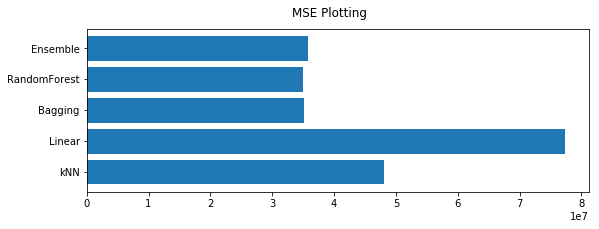

In [14]:
names = ['kNN', 'Linear', 'Bagging', 'RandomForest', 'Ensemble']
values = [mean_squared_error(y_test, knr.predict(X_test)), mean_squared_error(y_test, lr.predict(X_test)),
          mean_squared_error(y_test, br.predict(X_test)), mean_squared_error(y_test, rfr.predict(X_test)),
          mean_squared_error(y_test, mean_predict)]

plt.figure(1, figsize=(9, 3))

plt.barh(names, values, )
plt.suptitle('MSE Plotting')
# plt.xlim(0.8, 0.9)
plt.show()

Best model is RandomForestRegressor, and Ensemble is worse.